<a href="https://colab.research.google.com/github/maximolemos65-design/Challenge-Finanzas-Computacionales-1.0/blob/main/Copia_de_Challenge_Computacionales_1_0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Estadísticas básicas

Para acciones argentinas agregar '.BA' al final del ticker. Por ejemplo: 'GGAL.BA'

📌 Ingrese el ticker de la acción (ej: AAPL): aapl
📌 Ingrese la fecha de inicio (YYYY-MM-DD): 2020-01-01
📌 Ingrese la fecha de fin (YYYY-MM-DD): 2025-06-1
📌 Ingrese la periodicidad (1d, 1wk, 1mo): 1wk
📌 Ingrese la tasa libre de riesgo (ej: 0.05 para 5%): 0.05
📌 Ingrese el precio strike: 250
📌 Ingrese el tiempo al vencimiento (en años, ej: 0.5 = 6 meses): 0.6


/tmp/ipython-input-2074261744.py:26: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed



📊 Estadísticas de AAPL

— Parámetros —
Promedio retorno: 0.00363
Desvío retorno:   0.04418



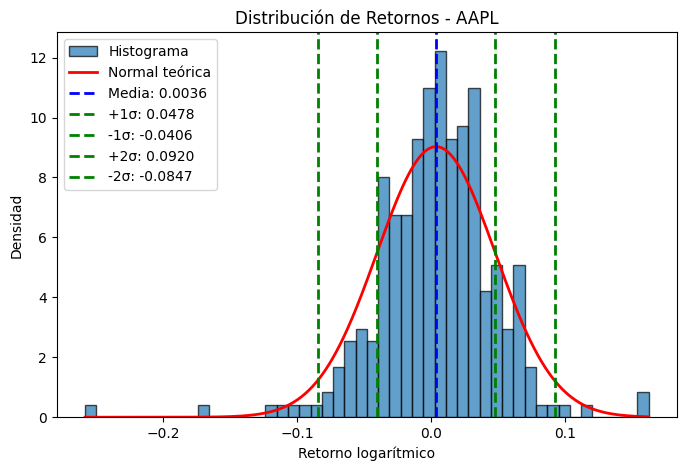


📊 Asimetría y Curtosis de la serie de retornos
Asimetría: -0.7715
Curtosis (total): 8.2417
Curtosis (exceso): 5.2417

Volatilidad anualizada: 0.31861

— Black-Scholes —
d1 = -0.6466
d2 = -0.8934
Nd1 = 0.2589
Nd2 = 0.1858

💰 Precio Call (BS): 6.87
   - Intrínseco: 0.00
   - Extrínseco: 6.87

💰 Precio Put  (BS): 48.86
   - Intrínseco: 49.38
   - Extrínseco: -0.52


/tmp/ipython-input-2074261744.py:109: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S = float(data['Close'].iloc[-1])  # Último precio spot


In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math
from scipy.stats import skew, kurtosis
import pandas as pd

# ==========================
# 1. Preguntas al usuario
# ==========================
print("Para acciones argentinas agregar '.BA' al final del ticker. Por ejemplo: 'GGAL.BA'\n")

ticker = input("📌 Ingrese el ticker de la acción (ej: AAPL): ").upper()
start_date = input("📌 Ingrese la fecha de inicio (YYYY-MM-DD): ")
end_date   = input("📌 Ingrese la fecha de fin (YYYY-MM-DD): ")
interval   = input("📌 Ingrese la periodicidad (1d, 1wk, 1mo): ")

r = float(input("📌 Ingrese la tasa libre de riesgo (ej: 0.05 para 5%): "))
K = float(input("📌 Ingrese el precio strike: "))
T = float(input("📌 Ingrese el tiempo al vencimiento (en años, ej: 0.5 = 6 meses): "))

# ==========================
# 2. Descargar datos
# ==========================
data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

# Retornos logarítmicos
data['Return'] = np.log(data['Close'] / data['Close'].shift(1))
returns = data['Return'].dropna()

# ==========================
# 4. Estadísticas básicas
# ==========================
mean_return = returns.mean()
std_return  = returns.std()

print(f"\n📊 Estadísticas de {ticker}")
print(f"\n— Parámetros —")
print(f"Promedio retorno: {mean_return:.5f}")
print(f"Desvío retorno:   {std_return:.5f}")
print()

# ==========================
# 5. Histograma con campana normal
# ==========================
plt.figure(figsize=(8,5))

# Histograma en densidad
count, bins, _ = plt.hist(returns, bins=50, density=True, edgecolor='black', alpha=0.7, label="Histograma")

# Rango para la curva normal
x = np.linspace(min(returns), max(returns), 1000)
pdf = norm.pdf(x, mean_return, std_return)

# Graficar campana normal
plt.plot(x, pdf, 'r-', linewidth=2, label="Normal teórica")

# Líneas de media y desviaciones estándar
plt.axvline(mean_return, color='blue', linestyle='dashed', linewidth=2, label=f"Media: {mean_return:.4f}")
plt.axvline(mean_return + std_return, color='green', linestyle='dashed', linewidth=2, label=f"+1σ: {mean_return+std_return:.4f}")
plt.axvline(mean_return - std_return, color='green', linestyle='dashed', linewidth=2, label=f"-1σ: {mean_return-std_return:.4f}")
plt.axvline(mean_return + 2*std_return, color='green', linestyle='dashed', linewidth=2, label=f"+2σ: {mean_return+2*std_return:.4f}")
plt.axvline(mean_return - 2*std_return, color='green', linestyle='dashed', linewidth=2, label=f"-2σ: {mean_return-2*std_return:.4f}")

# Estética del gráfico
plt.title(f"Distribución de Retornos - {ticker}")
plt.xlabel("Retorno logarítmico")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# ==========================
# 6. Asimetría y curtosis
# ==========================
asimetria = skew(returns)
curtosis_val = kurtosis(returns, fisher=False)  # fisher=True → curtosis "exceso" (0 = normal)
curtosis_total = kurtosis(returns, fisher=True)

print("\n📊 Asimetría y Curtosis de la serie de retornos")
print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis (total): {curtosis_val:.4f}")
print(f"Curtosis (exceso): {curtosis_total:.4f}")

# ==========================
# 7. Volatilidad histórica y ajuste por intervalo
# ==========================
if interval == "1d":
    factor = 252
    Dt = 1/252
elif interval == "1wk":
    factor = 52
    Dt = 1/52
elif interval == "1mo":
    factor = 12
    Dt = 1/12
else:
    factor = 252
    Dt = 1/252

vol_daily = std_return
vol_annual = vol_daily * np.sqrt(factor)

print(f"\nVolatilidad anualizada: {vol_annual:.5f}")

# ==========================
# 8. Black-Scholes
# ==========================
S = float(data['Close'].iloc[-1])  # Último precio spot
sigma = float(vol_annual)

d1 = (math.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)
Nd1 = norm.cdf(d1)
Nd2 = norm.cdf(d2)

print(f"\n— Black-Scholes —")
print(f"d1 = {d1:.4f}")
print(f"d2 = {d2:.4f}")
print(f"Nd1 = {Nd1:.4f}")
print(f"Nd2 = {Nd2:.4f}")

# ==========================
# 9. Precios de la opción
# ==========================
call_price = S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
put_price  = K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# ==========================
# 10. Valor intrínseco y extrínseco
# ==========================
call_intrinsic = max(S - K, 0)
put_intrinsic  = max(K - S, 0)

call_extrinsic = call_price - call_intrinsic
put_extrinsic  = put_price - put_intrinsic

print(f"\n💰 Precio Call (BS): {call_price:.2f}")
print(f"   - Intrínseco: {call_intrinsic:.2f}")
print(f"   - Extrínseco: {call_extrinsic:.2f}")

print(f"\n💰 Precio Put  (BS): {put_price:.2f}")
print(f"   - Intrínseco: {put_intrinsic:.2f}")
print(f"   - Extrínseco: {put_extrinsic:.2f}")


Volatilidad

— Cantidad de desvíos —

Media z-scores: 0.000000
Desvío z-scores: 1.000000


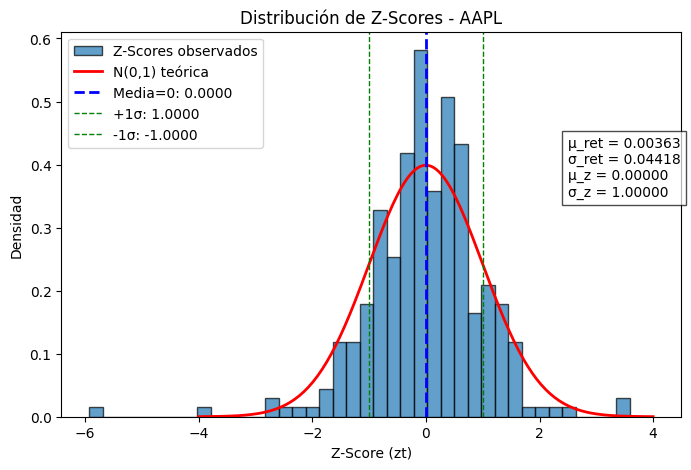


📊 Asimetría y Curtosis de la serie de Z-Scores
Asimetría: -0.7715
Curtosis: 8.2417

— Volatilidad móvil —


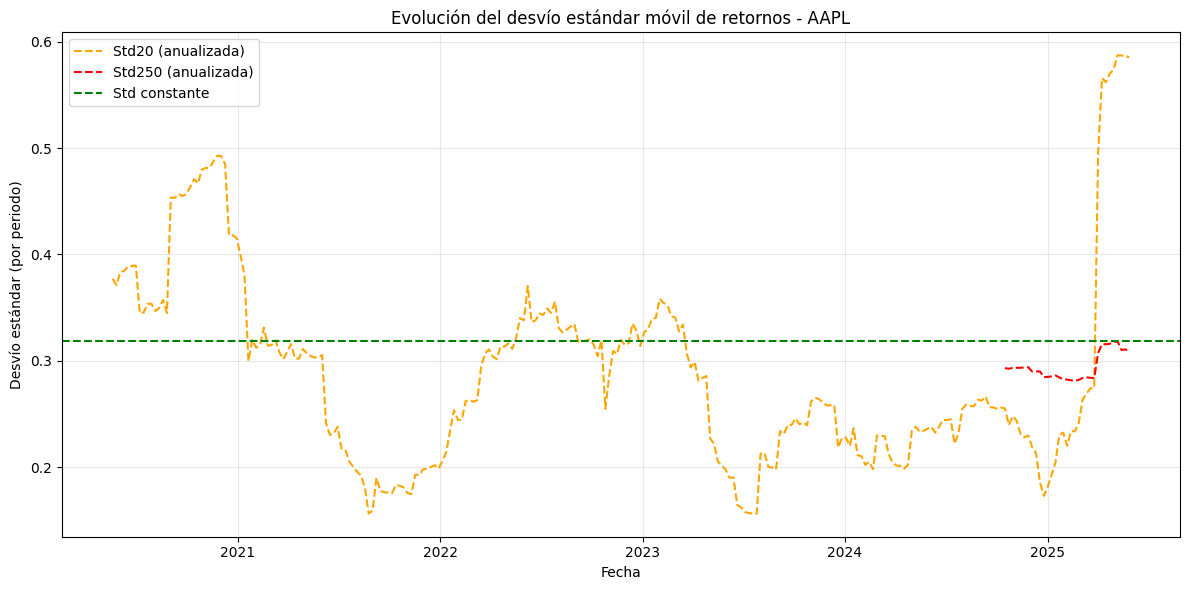


📊 Estadísticas - Volatilidades anualizadas
Último Std 20 (anualizado): 58.527001%
Último Std 250 (anualizado): 30.963457%
Volatilidad constante del período (anualizada): 31.860758%


In [ ]:
print("— Cantidad de desvíos —")

# ==========================
# 2.1 Calcular Z-scores
# ==========================
z_scores = (returns - mean_return) / std_return

# Media y desvío de los Z-scores
mean_z = z_scores.mean()
std_z  = z_scores.std()

print()
print(f"Media z-scores: {mean_z:.6f}")
print(f"Desvío z-scores: {std_z:.6f}")

# ==========================
# 2.3 Histograma de Z-Scores
# ==========================
plt.figure(figsize=(8,5))
plt.hist(z_scores, bins=40, edgecolor='black', alpha=0.7, density=True, label="Z-Scores observados")

# Curva normal estándar
x = np.linspace(-4, 4, 200)
plt.plot(x, norm.pdf(x, 0, 1), 'r-', lw=2, label="N(0,1) teórica")

# Líneas de referencia
plt.axvline(0, color='blue', linestyle='dashed', linewidth=2, label=f"Media=0: {mean_z:.4f}")
plt.axvline(1, color='green', linestyle='dashed', linewidth=1, label=f"+1σ: {mean_z+std_z:.4f}")
plt.axvline(-1, color='green', linestyle='dashed', linewidth=1, label=f"-1σ: {mean_z-std_z:.4f}")

# Texto con valores
plt.text(2.5, 0.35, f"μ_ret = {mean_return:.5f}\nσ_ret = {std_return:.5f}\nμ_z = {mean_z:.5f}\nσ_z = {std_z:.5f}",
         bbox=dict(facecolor='white', alpha=0.7))

plt.title(f"Distribución de Z-Scores - {ticker}")
plt.xlabel("Z-Score (zt)")
plt.ylabel("Densidad")
plt.legend()
plt.show()

# ==========================
# 2.4 Asimetría y curtosis de Z-Scores
# ==========================
asimetriaz = skew(z_scores)
curtosisz_val = kurtosis(z_scores, fisher=False)  # fisher=True → curtosis "exceso" (0 = normal)

print("\n📊 Asimetría y Curtosis de la serie de Z-Scores")
print(f"Asimetría: {asimetria:.4f}")
print(f"Curtosis: {curtosis_val:.4f}")

# ==========================
# 2.5 Medias móviles
# ==========================

print("\n— Volatilidad móvil —")

# --- Desvíos móviles (ventanas) calculados sobre data['Return'] para preservar índice ---
std_20 = data['Return'].rolling(window=20).std()    # desvío móvil 20 períodos
std_250 = data['Return'].rolling(window=250).std()  # desvío móvil 250 períodos

# Opcional: anualizar (descomentar si querés)
std_20_ann  = std_20 * np.sqrt(factor)
std_250_ann = std_250 * np.sqrt(factor)

# --- Gráfico ---
plt.figure(figsize=(12,6))
plt.plot(std_20.index, std_20_ann, '--', label='Std20 (anualizada)', color='orange')
plt.plot(std_250.index, std_250_ann, '--', label='Std250 (anualizada)', color='red')
plt.axhline(y=vol_annual, color='green', linestyle='--', linewidth=1.5, label=f'Std constante')

plt.title(f"Evolución del desvío estándar móvil de retornos - {ticker}")
plt.xlabel("Fecha")
plt.ylabel("Desvío estándar (por periodo)")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# --- Valores recientes (por si querés ver números) ---
last_std20 = std_20.dropna().iloc[-1] if std_20.dropna().size>0 else np.nan
last_std250 = std_250.dropna().iloc[-1] if std_250.dropna().size>0 else np.nan
# Si annualizás, mostrar:
print("\n📊 Estadísticas - Volatilidades anualizadas")
print(f"Último Std 20 (anualizado): {(last_std20*np.sqrt(factor)*100):.6f}%")
print(f"Último Std 250 (anualizado): {(last_std250*np.sqrt(factor)*100):.6f}%")
print(f"Volatilidad constante del período (anualizada): {(vol_annual*100):.6f}%")


Value at Risk

📌 Ingrese el nivel de confianza (ej: 0.95 para 95%): 0.95

🔹 Nivel de confianza (una cola, izquierda): 95.0%
   ➤ VaR empírico (5.0%) = -0.06184
   ➤ CVaR empírico (Expected Shortfall) = -0.09938
   ➤ Suma retornos cola = -1.49070
   ➤ Conteo retornos cola = 15


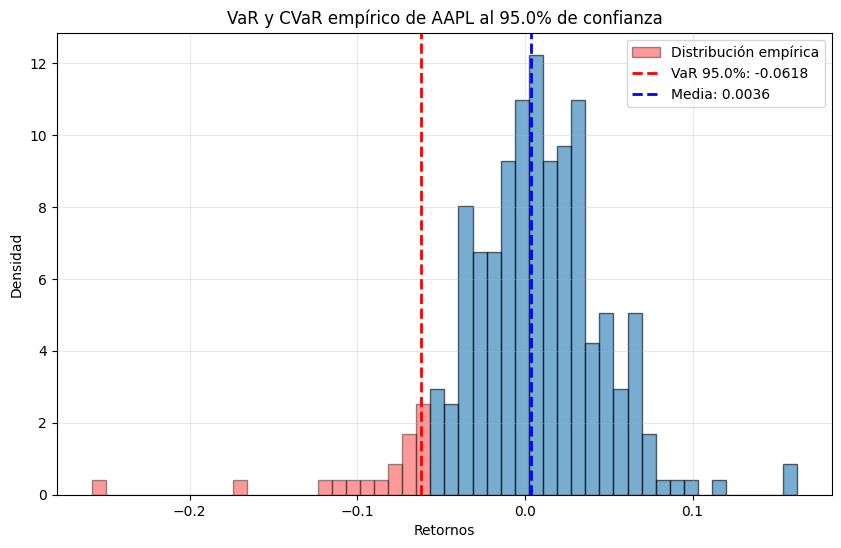


📊 Resultados VaR y CVaR empírico
Nivel de confianza: 95.0%
En el 5.00% de los casos, suponiendo una distribución normal de los retornos y bajo condiciones normales de mercado, AAPL tendrá un rendimiento menor o igual a -6.18436%.
¿Qué podemos esperar si se rompe el VaR? Para saberlo es útil hacer uso del VaR Condicional (CVaR), que es el promedio de los retornos más allá de esa barrera. Para este caso el CVaR es -9.93801%.


In [ ]:
# ==========================
# 14. Value at Risk (VaR empírico) + Conditional VaR con sombreado
# ==========================

import numpy as np
import matplotlib.pyplot as plt

# 1. Preguntar nivel de confianza
conf = float(input("📌 Ingrese el nivel de confianza (ej: 0.95 para 95%): "))
alpha = 1 - conf

# 2. Calcular percentil empírico (VaR)
VaR_empirico = np.percentile(returns, alpha*100)  # percentil en base a la muestra
mean_emp = returns.mean()

# 3. Filtrar retornos en la cola (<= VaR)
cola = returns[returns <= VaR_empirico]

# Suma, conteo y CVaR
suma_cola = cola.sum()
conteo_cola = cola.count()
CVaR_empirico = cola.mean()

print(f"\n🔹 Nivel de confianza (una cola, izquierda): {conf*100:.1f}%")
print(f"   ➤ VaR empírico ({alpha*100:.1f}%) = {VaR_empirico:.5f}")
print(f"   ➤ CVaR empírico (Expected Shortfall) = {CVaR_empirico:.5f}")
print(f"   ➤ Suma retornos cola = {suma_cola:.5f}")
print(f"   ➤ Conteo retornos cola = {conteo_cola}")

# 4. Graficar histograma con VaR y sombreado de la cola
plt.figure(figsize=(10,6))

# Histograma completo
counts, bins, patches = plt.hist(
    returns,
    bins=50,
    density=True,
    edgecolor='black',
    alpha=0.6,
    label="Distribución empírica"
)

# Sombrear las barras que están a la izquierda del VaR
for patch, bin_left in zip(patches, bins[:-1]):
    if bin_left <= VaR_empirico:
        patch.set_facecolor('red')
        patch.set_alpha(0.4)

# Línea en el VaR
plt.axvline(VaR_empirico, color="red", linestyle="--", linewidth=2, label=f"VaR {conf*100:.1f}%: {VaR_empirico:.4f}")

# Línea en la media
plt.axvline(mean_emp, color="blue", linestyle="--", linewidth=2, label=f"Media: {mean_emp:.4f}")

plt.title(f"VaR y CVaR empírico de {ticker} al {conf*100:.1f}% de confianza")
plt.xlabel("Retornos")
plt.ylabel("Densidad")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# 5. Mostrar resultados finales
print(f"\n📊 Resultados VaR y CVaR empírico")
print(f"Nivel de confianza: {conf*100:.1f}%")
print(f"En el {alpha*100:.2f}% de los casos, suponiendo una distribución normal de los retornos y bajo condiciones normales de mercado, {ticker} tendrá un rendimiento menor o igual a {VaR_empirico*100:.5f}%.")
print(f"¿Qué podemos esperar si se rompe el VaR? Para saberlo es útil hacer uso del VaR Condicional (CVaR), que es el promedio de los retornos más allá de esa barrera. Para este caso el CVaR es {CVaR_empirico*100:.5f}%.")


Simulación de Montecarlo

/tmp/ipython-input-3126142635.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S0 = float(data['Close'].iloc[-1])   # ✅ escalar


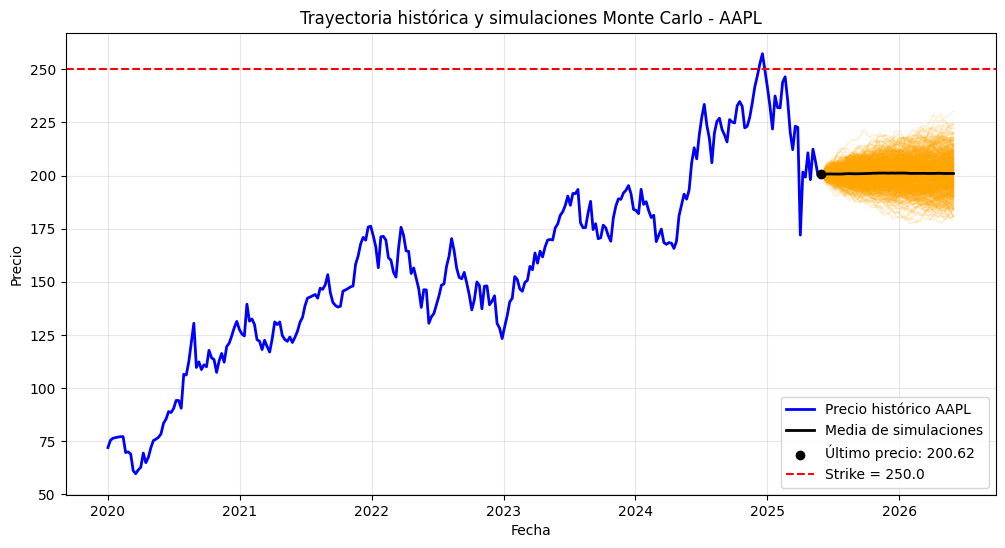

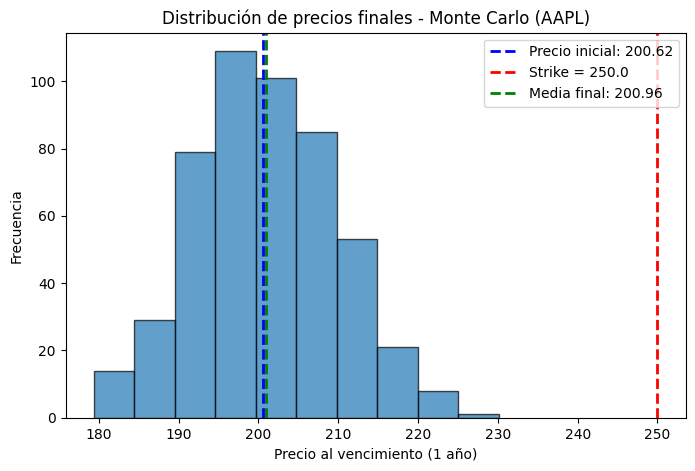


📊 Resultados Monte Carlo
Precio inicial: 200.62
Precio medio simulado a 1 año: 200.96
Desvío de precios finales: 8.85


In [ ]:
# ==========================
# Gráfico combinado: histórico + Monte Carlo
# ==========================

plt.figure(figsize=(12,6))

# 1. Gráfico histórico
plt.plot(data.index, data['Close'], label=f"Precio histórico {ticker}", color="blue", linewidth=2)

# 2. Determinar frecuencia según intervalo elegido
if interval == "1d":
    freq = "B"
    N = 252
elif interval == "1wk":
    freq = "W"
    N = 52
elif interval == "1mo":
    freq = "M"
    N = 12
else:
    freq = "B"
    N = 252

# 3. Simulaciones Monte Carlo
n_simulaciones = 500
simulaciones = np.zeros((N+1, n_simulaciones))   # incluye S0
S0 = float(data['Close'].iloc[-1])   # ✅ escalar
mu = mean_return
sigma = std_return
dt = Dt   # ya lo definiste según intervalo

for j in range(n_simulaciones):
    prices = [S0]
    for t in range(1, N+1):
        z = np.random.normal()
        St = float(prices[-1] * np.exp((mu - 0.5 * sigma**2)*dt + sigma*np.sqrt(dt)*z))  # ✅ float
        prices.append(St)
    simulaciones[:, j] = np.array(prices).flatten()   # ✅ vector 1D

    # Fechas futuras (arranca después del último dato real)
    future_dates = pd.date_range(start=data.index[-1], periods=N+1, freq=freq)[1:]
    plt.plot(future_dates, prices[1:], linewidth=1, alpha=0.2, color="orange")

# 4. Línea promedio de todas las simulaciones
mean_path = simulaciones.mean(axis=1)[1:]
plt.plot(future_dates, mean_path, color="black", linewidth=2, label="Media de simulaciones")

# 5. Último precio como referencia
plt.scatter(data.index[-1], S0, color="black", zorder=5, label=f"Último precio: {S0:.2f}")

# 6. Strike
plt.axhline(y=K, color="red", linestyle="--", linewidth=1.5, label=f"Strike = {K}")

# 7. Formato
plt.title(f"Trayectoria histórica y simulaciones Monte Carlo - {ticker}")
plt.xlabel("Fecha")
plt.ylabel("Precio")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# ==========================
# 8. Histograma de precios finales
# ==========================
final_prices = simulaciones[-1, :]  # últimos precios de cada simulación

plt.figure(figsize=(8,5))
plt.hist(final_prices, bins=10, edgecolor='black', alpha=0.7)

# Línea en el precio inicial
plt.axvline(S0, color="blue", linestyle="--", linewidth=2, label=f"Precio inicial: {S0:.2f}")

# Línea en el strike
plt.axvline(K, color="red", linestyle="--", linewidth=2, label=f"Strike = {K}")

# Estadísticas
mean_final = np.mean(final_prices)
std_final  = np.std(final_prices)

print()
plt.axvline(mean_final, color="green", linestyle="--", linewidth=2, label=f"Media final: {mean_final:.2f}")
plt.title(f"Distribución de precios finales - Monte Carlo ({ticker})")
plt.xlabel("Precio al vencimiento (1 año)")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

print("\n📊 Resultados Monte Carlo")
print(f"Precio inicial: {S0:.2f}")
print(f"Precio medio simulado a 1 año: {mean_final:.2f}")
print(f"Desvío de precios finales: {std_final:.2f}")


VI

📌 ¿Cuántas opciones desea ingresar? 5

--- Opción 1 ---
👉 Strike de la opción: 300
👉 Precio de mercado de la opción: 65.5
👉 Tipo de opción (C para Call / P para Put): C
✅ Strike 300.00, C: IV ≈ 27.35%

--- Opción 2 ---
👉 Strike de la opción: 320
👉 Precio de mercado de la opción: 52.04
👉 Tipo de opción (C para Call / P para Put): C
✅ Strike 320.00, C: IV ≈ 29.06%

--- Opción 3 ---
👉 Strike de la opción: 350
👉 Precio de mercado de la opción: 39.15
👉 Tipo de opción (C para Call / P para Put): C
✅ Strike 350.00, C: IV ≈ 34.07%

--- Opción 4 ---
👉 Strike de la opción: 370
👉 Precio de mercado de la opción: 30.5
👉 Tipo de opción (C para Call / P para Put): C
✅ Strike 370.00, C: IV ≈ 34.39%

--- Opción 5 ---
👉 Strike de la opción: 390
👉 Precio de mercado de la opción: 23.43
👉 Tipo de opción (C para Call / P para Put): C
✅ Strike 390.00, C: IV ≈ 34.59%

📊 Resultados de Volatilidad Implícita
Strike 300.00 | C | Precio 65.50 | IV ≈ 27.35%
Strike 320.00 | C | Precio 52.04 | IV ≈ 29.06%
Strike 350.

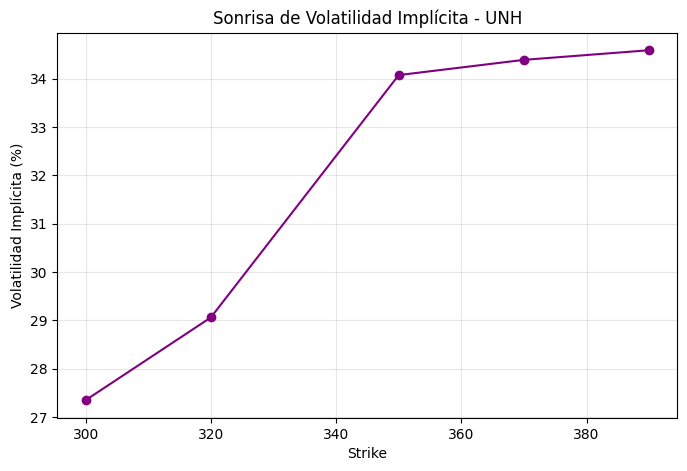

In [ ]:
# ==========================
# 15. Volatilidad implícita
# ==========================

from scipy.optimize import brentq  # búsqueda de raíces

# ==========================
# 1. Volatilidad Implícita (varios strikes)
# ==========================

n_opciones = int(input("📌 ¿Cuántas opciones desea ingresar? "))

resultados = []

for i in range(n_opciones):
    print(f"\n--- Opción {i+1} ---")
    K_input = float(input("👉 Strike de la opción: "))
    precio_opcion = float(input("👉 Precio de mercado de la opción: "))
    tipo = input("👉 Tipo de opción (C para Call / P para Put): ").upper()

    # Función de Black-Scholes
    def black_scholes(S, K, T, r, sigma, tipo="C"):
        d1 = (math.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * math.sqrt(T))
        d2 = d1 - sigma * math.sqrt(T)
        if tipo == "C":
            return S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
        else:
            return K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    # Función objetivo
    def objective(sigma):
        return black_scholes(S, K_input, T, r, sigma, tipo) - precio_opcion

    try:
        iv = brentq(objective, 1e-6, 5)  # rango: 0.01% a 500% anual
        resultados.append((K_input, tipo, precio_opcion, iv))
        print(f"✅ Strike {K_input:.2f}, {tipo}: IV ≈ {iv*100:.2f}%")
    except ValueError:
        print(f"⚠️ No se pudo encontrar IV para Strike {K_input:.2f}")

# ==========================
# Mostrar tabla final
# ==========================
print("\n📊 Resultados de Volatilidad Implícita")
for K_input, tipo, precio, iv in resultados:
    print(f"Strike {K_input:.2f} | {tipo} | Precio {precio:.2f} | IV ≈ {iv*100:.2f}%")

# ==========================
# Gráfico: Sonrisa de Volatilidad
# ==========================
if len(resultados) > 0:
    strikes = [r[0] for r in resultados]
    ivs = [r[3] for r in resultados]

    plt.figure(figsize=(8,5))
    plt.plot(strikes, [iv*100 for iv in ivs], marker="o", linestyle="-", color="purple")
    plt.title(f"Sonrisa de Volatilidad Implícita - {ticker}")
    plt.xlabel("Strike")
    plt.ylabel("Volatilidad Implícita (%)")
    plt.grid(alpha=0.3)
    plt.show()




Volumen

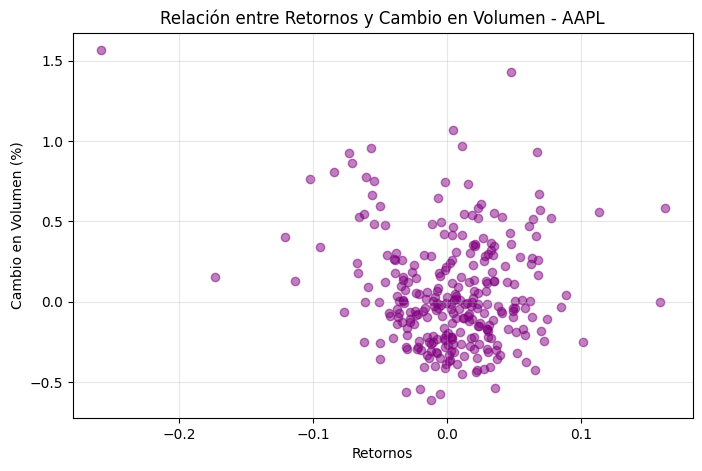


📊 Correlación Retornos vs Cambio en Volumen: -0.1440

📊 Métricas de volumen para AAPL
Promedio : 423,742,391
Desvío   : 233,180,058
Máximo   : 1,691,284,400
Mínimo   : 142,634,000


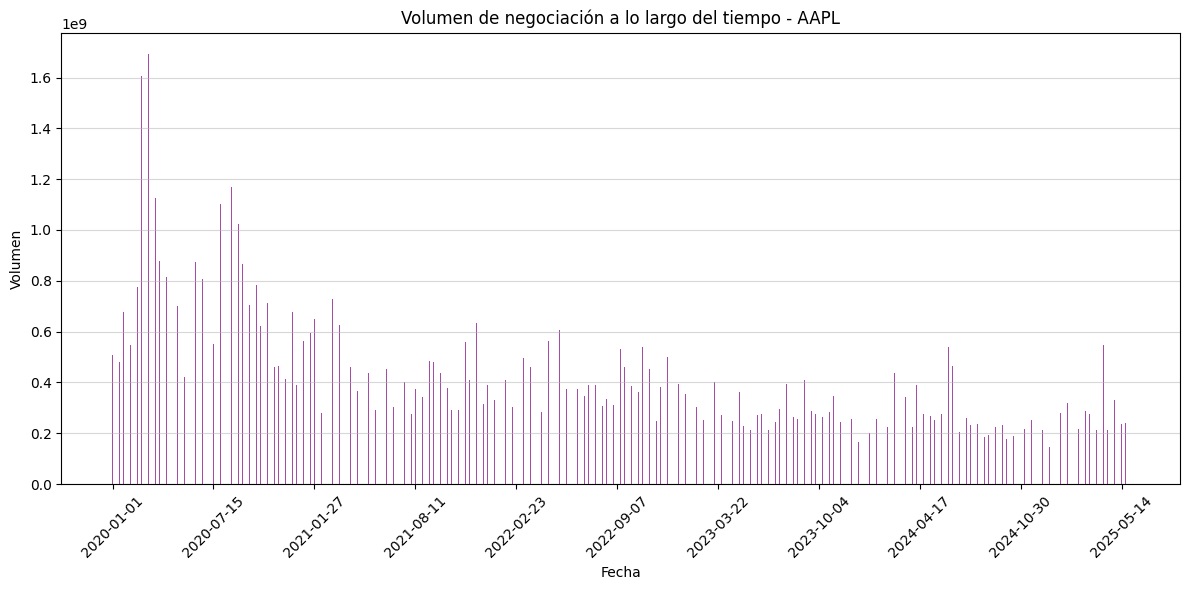

In [ ]:
# ==========================
# 1. Preparar datos
# ==========================
# returns ya lo tenés calculado antes
# Calcular cambio porcentual en volumen
volumen = data['Volume'].squeeze()   # para que sea Serie
vol_change = volumen.pct_change()

# Combinar en un DataFrame
df_aux = pd.DataFrame({
    "Return": returns,
    "Vol_Change": vol_change
}).dropna()

# ==========================
# 2. Gráfico de dispersión
# ==========================
plt.figure(figsize=(8,5))
plt.scatter(df_aux['Return'], df_aux['Vol_Change'], alpha=0.5, color="purple")
plt.title(f"Relación entre Retornos y Cambio en Volumen - {ticker}")
plt.xlabel("Retornos")
plt.ylabel("Cambio en Volumen (%)")
plt.grid(alpha=0.3)
plt.show()

# ==========================
# 3. Correlación explícita
# ==========================
correlacion = df_aux['Return'].corr(df_aux['Vol_Change'])
print(f"\n📊 Correlación Retornos vs Cambio en Volumen: {correlacion:.4f}")


# ==========================
# 4. Estadísticas
# ==========================
vol_media  = volumen.mean()
vol_desvio = volumen.std()
vol_max    = volumen.max()
vol_min    = volumen.min()

print(f"\n📊 Métricas de volumen para {ticker}")
print(f"Promedio : {vol_media:,.0f}")
print(f"Desvío   : {vol_desvio:,.0f}")
print(f"Máximo   : {vol_max:,.0f}")
print(f"Mínimo   : {vol_min:,.0f}")

# ==========================
# 5. Gráfico de barras de Volumen
# ==========================
plt.figure(figsize=(12, 6))
plt.bar(volumen.index, volumen.values, width=1, color='purple', alpha=0.7)
plt.title(f"Volumen de negociación a lo largo del tiempo - {ticker}")
plt.xlabel("Fecha")
plt.ylabel("Volumen")
plt.grid(axis='y', alpha=0.5)
plt.xticks(volumen.index[::len(volumen)//10], rotation=45) # Set x-axis ticks to a subset of dates
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

Sugerencia de estrategia

In [ ]:
# tipo de estrategia
# tendencia
# volatilidad

Momentum - Variaciones

In [ ]:
import numpy as np
import pandas as pd

# Create a new DataFrame for the momentum variations
momentum_data = pd.DataFrame(index=data.index)

# Paso 1: clasificar retorno actual y agregar a momentum_data
condiciones = [
    data['Return'] > 0,
    data['Return'] < 0,
    data['Return'] == 0
]
valores = ['Positivo', 'Negativo', 'Sin variación']
momentum_data['Return_class'] = np.select(condiciones, valores, default='Sin variación')

# Paso 2: clasificación del retorno anterior y agregar a momentum_data
momentum_data['Return_lag1'] = momentum_data['Return_class'].shift(1)
momentum_data['Return_lag1'] = momentum_data['Return_lag1'].fillna('Sin dato previo')

# Paso 3: retornos de días previos y agregar a momentum_data
momentum_data['Return_lag2'] = momentum_data['Return_class'].shift(2)
momentum_data['Return_lag2'] = momentum_data['Return_lag2'].fillna('Sin dato previo')
momentum_data['Return_lag3'] = momentum_data['Return_class'].shift(3)
momentum_data['Return_lag3'] = momentum_data['Return_lag3'].fillna('Sin dato previo')
momentum_data['Return_lag4'] = momentum_data['Return_class'].shift(4)
momentum_data['Return_lag4'] = momentum_data['Return_lag4'].fillna('Sin dato previo')

# ------------------------------------------------------------------------LAG1-----------------------------------------------------------------------------------------------

# Filter momentum_data where 'Return_class' is 'Positivo'
filtered_momentum_data_positivo = momentum_data[momentum_data['Return_class'] == 'Positivo']

# Count positive and negative values in Return_lag1 for the filtered data (Positivo)
count_pp = filtered_momentum_data_positivo['Return_lag1'].value_counts().get('Positivo', 0)
count_pn = filtered_momentum_data_positivo['Return_lag1'].value_counts().get('Negativo', 0)
count_svarp1 = filtered_momentum_data_positivo['Return_lag1'].value_counts().get('Sin variación', 0)
total_lag1_positivo = count_pp + count_pn + count_svarp1
prob_pp = count_pp / total_lag1_positivo
prob_pn = count_pn / total_lag1_positivo

print(f"Probabilidad positivo-positivo: {prob_pp*100:.2f}%")
print(f"Probabilidad positivo-negativo: {prob_pn*100:.2f}%")

# Filter momentum_data where 'Return_class' is 'Negativo'
filtered_momentum_data_negativo = momentum_data[momentum_data['Return_class'] == 'Negativo']

# Count positive and negative values in Return_lag1 for the filtered data (Negativo)
count_np = filtered_momentum_data_negativo['Return_lag1'].value_counts().get('Positivo', 0)
count_nn = filtered_momentum_data_negativo['Return_lag1'].value_counts().get('Negativo', 0)
count_svarn1 = filtered_momentum_data_negativo['Return_lag1'].value_counts().get('Sin variación', 0)
total_lag1_negativo = count_np + count_nn + count_svarn1
prob_nn = count_nn / total_lag1_negativo
prob_np = count_np / total_lag1_negativo

print(f"Probabilidad negativo-negativo: {prob_nn*100:.2f}%")
print(f"Probabilidad negativo-positivo: {prob_np*100:.2f}%")

# ------------------------------------------------------------------------LAG2-----------------------------------------------------------------------------------------------

# Filter momentum_data where 'Return_class' and 'Return_lag1' are 'Positivo'
filtered_momentum_data_pp = momentum_data[(momentum_data['Return_class'] == 'Positivo') & (momentum_data['Return_lag1'] == 'Positivo')]

# Count positive and negative values in Return_lag2 for the filtered data (Positivo, Positivo)
count_ppp = filtered_momentum_data_pp['Return_lag2'].value_counts().get('Positivo', 0)
count_ppn = filtered_momentum_data_pp['Return_lag2'].value_counts().get('Negativo', 0)
count_svarpp2 = filtered_momentum_data_pp['Return_lag2'].value_counts().get('Sin variación', 0)
total_lag2_positivo = count_ppp + count_ppn + count_svarpp2
prob_ppp = count_ppp / total_lag2_positivo
prob_ppn = count_ppn / total_lag2_positivo

print(f"Probabilidad positivo-positivo-positivo: {prob_ppp*100:.2f}%")
print(f"Probabilidad positivo-positivo-negativo: {prob_ppn*100:.2f}%")

# Filter momentum_data where 'Return_class' and 'Return_lag1' are 'Negativo'
filtered_momentum_data_nn = momentum_data[(momentum_data['Return_class'] == 'Negativo') & (momentum_data['Return_lag1'] == 'Negativo')]

# Count positive and negative values in Return_lag1 for the filtered data (Negativo)
count_nnp = filtered_momentum_data_nn['Return_lag2'].value_counts().get('Positivo', 0)
count_nnn = filtered_momentum_data_nn['Return_lag2'].value_counts().get('Negativo', 0)
count_svarnn2 = filtered_momentum_data_nn['Return_lag2'].value_counts().get('Sin variación', 0)
total_lag2_negativo = count_nnp + count_nnn + count_svarnn2
prob_nnp = count_nnp / total_lag2_negativo
prob_nnn = count_nnn / total_lag2_negativo

print(f"Probabilidad negativo-negativo-positivo: {prob_nnp*100:.2f}%")
print(f"Probabilidad negativo-negativo-negativo: {prob_nnn*100:.2f}%")

# ------------------------------------------------------------------------LAG3-----------------------------------------------------------------------------------------------

# Filter momentum_data where 'Return_class' and 'Return_lag1' are 'Positivo'
filtered_momentum_data_ppp = momentum_data[(momentum_data['Return_class'] == 'Positivo') & (momentum_data['Return_lag1'] == 'Positivo') & (momentum_data['Return_lag2'] == 'Positivo')]

# Count positive and negative values in Return_lag2 for the filtered data (Positivo, Positivo)
count_pppp = filtered_momentum_data_ppp['Return_lag3'].value_counts().get('Positivo', 0)
count_pppn = filtered_momentum_data_ppp['Return_lag3'].value_counts().get('Negativo', 0)
count_svarpp3 = filtered_momentum_data_ppp['Return_lag3'].value_counts().get('Sin variación', 0)
total_lag3_positivo = count_pppp + count_pppn + count_svarpp3
prob_pppp = count_pppp / total_lag3_positivo
prob_pppn = count_pppn / total_lag3_positivo

print(f"Probabilidad positivo-positivo-positivo-positivo: {prob_pppp*100:.2f}%")
print(f"Probabilidad positivo-positivo-positivo-negativo: {prob_pppn*100:.2f}%")

# Filter momentum_data where 'Return_class' and 'Return_lag1' are 'Negativo'
filtered_momentum_data_nnn = momentum_data[(momentum_data['Return_class'] == 'Negativo') & (momentum_data['Return_lag1'] == 'Negativo') & (momentum_data['Return_lag2'] == 'Negativo')]

# Count positive and negative values in Return_lag1 for the filtered data (Negativo)
count_nnnp = filtered_momentum_data_nnn['Return_lag3'].value_counts().get('Positivo', 0)
count_nnnn = filtered_momentum_data_nnn['Return_lag3'].value_counts().get('Negativo', 0)
count_svarnn3 = filtered_momentum_data_nnn['Return_lag3'].value_counts().get('Sin variación', 0)
total_lag3_negativo = count_nnnp + count_nnnn + count_svarnn3
prob_nnnp = count_nnnp / total_lag3_negativo
prob_nnnn = count_nnnn / total_lag3_negativo

print(f"Probabilidad negativo-negativo-negativo-positivo: {prob_nnnp*100:.2f}%")
print(f"Probabilidad negativo-negativo-negativo-negativo: {prob_nnnn*100:.2f}%")

# ------------------------------------------------------------------------LAG4-----------------------------------------------------------------------------------------------

# Filter momentum_data where 'Return_class' and 'Return_lag1' are 'Positivo'
filtered_momentum_data_pppp = momentum_data[(momentum_data['Return_class'] == 'Positivo') & (momentum_data['Return_lag1'] == 'Positivo') & (momentum_data['Return_lag2'] == 'Positivo') & (momentum_data['Return_lag3'] == 'Positivo')]

# Count positive and negative values in Return_lag2 for the filtered data (Positivo, Positivo)
count_ppppp = filtered_momentum_data_pppp['Return_lag4'].value_counts().get('Positivo', 0)
count_ppppn = filtered_momentum_data_pppp['Return_lag4'].value_counts().get('Negativo', 0)
count_svarppp3 = filtered_momentum_data_pppp['Return_lag4'].value_counts().get('Sin variación', 0)
total_lag4_positivo = count_ppppp + count_ppppn + count_svarppp3
prob_ppppp = count_ppppp / total_lag4_positivo
prob_ppppn = count_ppppn / total_lag4_positivo

print(f"Probabilidad positivo-positivo-positivo-positivo-positivo: {prob_ppppp*100:.2f}%")
print(f"Probabilidad positivo-positivo-positivo-positivo-negativo: {prob_ppppn*100:.2f}%")

# Filter momentum_data where 'Return_class' and 'Return_lag1' are 'Negativo'
filtered_momentum_data_nnnn = momentum_data[(momentum_data['Return_class'] == 'Negativo') & (momentum_data['Return_lag1'] == 'Negativo') & (momentum_data['Return_lag2'] == 'Negativo') & (momentum_data['Return_lag3'] == 'Negativo')]

# Count positive and negative values in Return_lag1 for the filtered data (Negativo)
count_nnnnp = filtered_momentum_data_nn['Return_lag4'].value_counts().get('Positivo', 0)
count_nnnnn = filtered_momentum_data_nn['Return_lag4'].value_counts().get('Negativo', 0)
count_svarnnn3 = filtered_momentum_data_nn['Return_lag4'].value_counts().get('Sin variación', 0)
total_lag4_negativo = count_nnnnp + count_nnnnn + count_svarnnn3
prob_nnnnp = count_nnnnp / total_lag4_negativo
prob_nnnnn = count_nnnnn / total_lag4_negativo

print(f"Probabilidad negativo-negativo-negativo-negativo-positivo: {prob_nnnnp*100:.2f}%")
print(f"Probabilidad negativo-negativo-negativo-negativo-negativo: {prob_nnnnn*100:.2f}%")


Probabilidad positivo-positivo: 59.49%
Probabilidad positivo-negativo: 39.87%
Probabilidad negativo-negativo: 49.19%
Probabilidad negativo-positivo: 50.81%
Probabilidad positivo-positivo-positivo: 63.83%
Probabilidad positivo-positivo-negativo: 35.11%
Probabilidad negativo-negativo-positivo: 54.10%
Probabilidad negativo-negativo-negativo: 45.90%
Probabilidad positivo-positivo-positivo-positivo: 66.67%
Probabilidad positivo-positivo-positivo-negativo: 31.67%
Probabilidad negativo-negativo-negativo-positivo: 71.43%
Probabilidad negativo-negativo-negativo-negativo: 28.57%
Probabilidad positivo-positivo-positivo-positivo-positivo: 75.00%
Probabilidad positivo-positivo-positivo-positivo-negativo: 22.50%
Probabilidad negativo-negativo-negativo-negativo-positivo: 57.38%
Probabilidad negativo-negativo-negativo-negativo-negativo: 42.62%


In [ ]:
momentum_data

,Return_class,Return_lag1,Return_lag2,Return_lag3,Return_lag4
Date,,,,,
2010-01-04,Sin variación,Sin dato previo,Sin dato previo,Sin dato previo,Sin dato previo
2010-01-05,Positivo,Sin variación,Sin dato previo,Sin dato previo,Sin dato previo
2010-01-06,Positivo,Positivo,Sin variación,Sin dato previo,Sin dato previo
2010-01-07,Positivo,Positivo,Positivo,Sin variación,Sin dato previo
2010-01-08,Positivo,Positivo,Positivo,Positivo,Sin variación
...,...,...,...,...,...
2025-09-11,Positivo,Positivo,Positivo,Positivo,Negativo
2025-09-12,Negativo,Positivo,Positivo,Positivo,Positivo
2025-09-15,Positivo,Negativo,Positivo,Positivo,Positivo


In [ ]:
# ideas posibles
# montecarlo OK
# VaR OK
# volatilidad implicita poniendo una base y su precio YA FUE PQ NO TENEMOS EN CUENTA DIVIDENDOS DIFIERE CON TRADINGVIEW
# grafico de serie de precio OK
# hacerlo mas interactivo (consultarle al usuario si le gustaria ver tal información, consultarle si quisiera más explicación sobre un concepto)
# curtosis y asimetria OK
# analisis de volumen? AGREGAR GRAFICO DE BARRAS
# planillas?No creo, a lo sumo letras griegas
# flourish ver por graficos dinamicos

Intento de pregunta posterior

Para acciones argentinas agregar '.BA' al final del ticker. Por ejemplo: 'GGAL.BA'

📌 Ingrese el ticker de la acción (ej: AAPL): NVDA
📌 Ingrese la fecha de inicio (YYYY-MM-DD): 2020-01-01
📌 Ingrese la fecha de fin (YYYY-MM-DD): 2025-01-01
📌 Ingrese la periodicidad (1d, 1wk, 1mo): 1D
📌 Ingrese la tasa libre de riesgo (ej: 0.05 para 5%): 0.0425
📌 Ingrese el precio strike: 150
📌 Ingrese el tiempo al vencimiento (en años, ej: 0.5 = 6 meses): 0.5


/tmp/ipython-input-223210759.py:24: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date, interval=interval)
[*********************100%***********************]  1 of 1 completed



📊 Estadísticas de NVDA

— Parámetros —
Promedio retorno: 0.00248
Desvío retorno:   0.03371



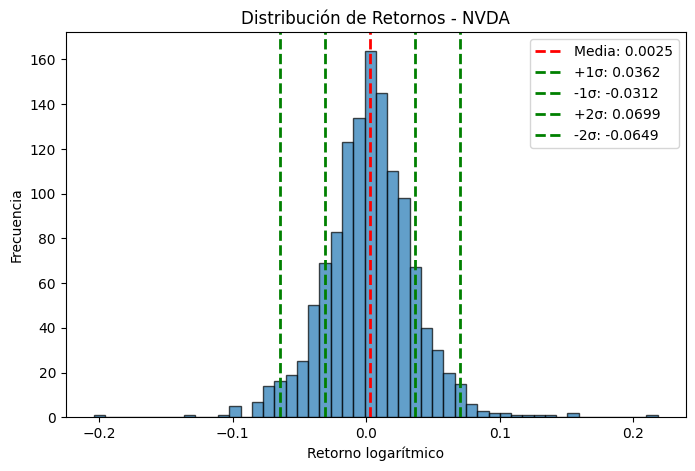

/tmp/ipython-input-223210759.py:82: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  S = float(data['Close'].iloc[-1])  # Último precio spot



Volatilidad anualizada: 0.53517

— Black-Scholes —
d1 = -0.0474
d2 = -0.4258
Nd1 = 0.4811
Nd2 = 0.3351

💰 Precio Call (BS): 15.39
   - Intrínseco: 0.00
   - Extrínseco: 15.39

💰 Precio Put  (BS): 27.96
   - Intrínseco: 15.73
   - Extrínseco: 12.23

— Volatilidad —

📌 ¿Desea conocer la distribución de los desvíos (Z-scores)? (s/n): S

📊 Resultados de Z-scores
Media de z-scores: -0.0000
Desvío estándar de z-scores: 0.9996



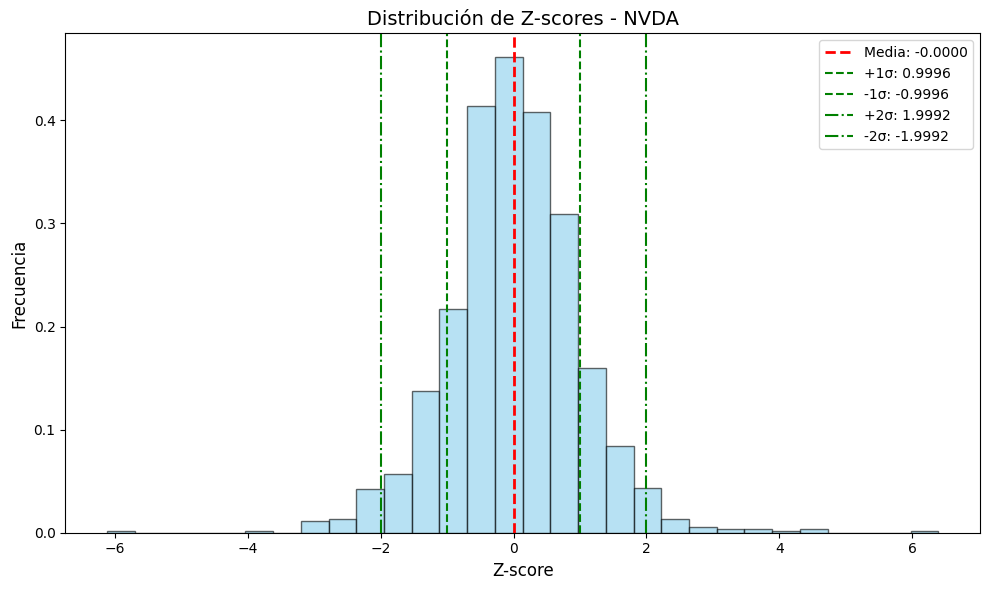

In [ ]:
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import math

# ==========================
# 1. Preguntas al usuario
# ==========================
print("Para acciones argentinas agregar '.BA' al final del ticker. Por ejemplo: 'GGAL.BA'\n")

ticker = input("📌 Ingrese el ticker de la acción (ej: AAPL): ").upper()
start_date = input("📌 Ingrese la fecha de inicio (YYYY-MM-DD): ")
end_date   = input("📌 Ingrese la fecha de fin (YYYY-MM-DD): ")
interval   = input("📌 Ingrese la periodicidad (1d, 1wk, 1mo): ")

r = float(input("📌 Ingrese la tasa libre de riesgo (ej: 0.05 para 5%): "))
K = float(input("📌 Ingrese el precio strike: "))
T = float(input("📌 Ingrese el tiempo al vencimiento (en años, ej: 0.5 = 6 meses): "))

# ==========================
# 2. Descargar datos
# ==========================
data = yf.download(ticker, start=start_date, end=end_date, interval=interval)

# Retornos logarítmicos
data['Return'] = np.log(data['Close'] / data['Close'].shift(1))
returns = data['Return'].dropna()

# ==========================
# 3. Estadísticas básicas
# ==========================
mean_return = returns.mean()
std_return  = returns.std()

print(f"\n📊 Estadísticas de {ticker}")
print(f"\n— Parámetros —")
print(f"Promedio retorno: {mean_return:.5f}")
print(f"Desvío retorno:   {std_return:.5f}")
print()

# ==========================
# 4. Histograma
# ==========================
plt.figure(figsize=(8,5))
plt.hist(returns, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(mean_return, color='red', linestyle='dashed', linewidth=2, label=f"Media: {mean_return:.4f}")
plt.axvline(mean_return + std_return, color='green', linestyle='dashed', linewidth=2, label=f"+1σ: {mean_return+std_return:.4f}")
plt.axvline(mean_return - std_return, color='green', linestyle='dashed', linewidth=2, label=f"-1σ: {mean_return-std_return:.4f}")
plt.axvline(mean_return + 2*std_return, color='green', linestyle='dashed', linewidth=2, label=f"+2σ: {mean_return+2*std_return:.4f}")
plt.axvline(mean_return - 2*std_return, color='green', linestyle='dashed', linewidth=2, label=f"-2σ: {mean_return-2*std_return:.4f}")
plt.title(f"Distribución de Retornos - {ticker}")
plt.xlabel("Retorno logarítmico")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

# ==========================
# 5. Volatilidad histórica y ajuste por intervalo
# ==========================
if interval == "1d":
    factor = 252
    Dt = 1/252
elif interval == "1wk":
    factor = 52
    Dt = 1/52
elif interval == "1mo":
    factor = 12
    Dt = 1/12
else:
    factor = 252
    Dt = 1/252

vol_daily = std_return
vol_annual = vol_daily * np.sqrt(factor)

print(f"\nVolatilidad anualizada: {vol_annual:.5f}")

# ==========================
# 7. Black-Scholes
# ==========================
S = float(data['Close'].iloc[-1])  # Último precio spot
sigma = float(vol_annual)

d1 = (math.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma * math.sqrt(T))
d2 = d1 - sigma * math.sqrt(T)
Nd1 = norm.cdf(d1)
Nd2 = norm.cdf(d2)

print(f"\n— Black-Scholes —")
print(f"d1 = {d1:.4f}")
print(f"d2 = {d2:.4f}")
print(f"Nd1 = {Nd1:.4f}")
print(f"Nd2 = {Nd2:.4f}")

# ==========================
# 8. Precios de la opción
# ==========================
call_price = S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
put_price  = K * math.exp(-r*T) * norm.cdf(-d2) - S * norm.cdf(-d1)

# ==========================
# 9. Valor intrínseco y extrínseco
# ==========================
call_intrinsic = max(S - K, 0)
put_intrinsic  = max(K - S, 0)

call_extrinsic = call_price - call_intrinsic
put_extrinsic  = put_price - put_intrinsic

print(f"\n💰 Precio Call (BS): {call_price:.2f}")
print(f"   - Intrínseco: {call_intrinsic:.2f}")
print(f"   - Extrínseco: {call_extrinsic:.2f}")

print(f"\n💰 Precio Put  (BS): {put_price:.2f}")
print(f"   - Intrínseco: {put_intrinsic:.2f}")
print(f"   - Extrínseco: {put_extrinsic:.2f}")
print()

print("— Volatilidad —")

# ==========================
# 10. Pregunta al usuario
# ==========================
ver_distribucion = input("\n📌 ¿Desea conocer la distribución de los desvíos (Z-scores)? (s/n): ").lower()

if ver_distribucion == "s":
   # Calcular media y desvío de los z-scores
    z_scores = (returns - mean_return) / std_return
    z_mean = np.mean(z_scores)
    z_std = np.std(z_scores)

    # Mostrar resultados en consola
    print("\n📊 Resultados de Z-scores")
    print(f"Media de z-scores: {z_mean:.4f}")
    print(f"Desvío estándar de z-scores: {z_std:.4f}\n")

    # Graficar histograma de z-scores
    plt.figure(figsize=(10,6))
    plt.hist(z_scores, bins=30, density=True, alpha=0.6, color="skyblue", edgecolor="black")

    # Agregar líneas de media y ±σ
    plt.axvline(z_mean, color='red', linestyle='--', linewidth=2, label=f"Media: {z_mean:.4f}")
    plt.axvline(z_mean + z_std, color='green', linestyle='--', linewidth=1.5, label=f"+1σ: {z_mean+z_std:.4f}")
    plt.axvline(z_mean - z_std, color='green', linestyle='--', linewidth=1.5, label=f"-1σ: {z_mean-z_std:.4f}")
    plt.axvline(z_mean + 2*z_std, color='green', linestyle='-.', linewidth=1.5, label=f"+2σ: {z_mean+2*z_std:.4f}")
    plt.axvline(z_mean - 2*z_std, color='green', linestyle='-.', linewidth=1.5, label=f"-2σ: {z_mean-2*z_std:.4f}")

    # Título y etiquetas
    plt.title(f"Distribución de Z-scores - {ticker}", fontsize=14)
    plt.xlabel("Z-score", fontsize=12)
    plt.ylabel("Frecuencia", fontsize=12)
    plt.legend()
    plt.tight_layout()  # <-- asegura que no se corte nada
    plt.show()

else:
    print("\n✅ Éxitos con las inversiones!")